In [2]:
import pandas as pd
rental_prices = pd.read_csv("Downloads/Datathon Materials 2/rental_prices.csv")

In [3]:
rental_prices.head()

,zipcode,city,state,metro,county,month,1_br_total,2_br_total,3_br_total,4_br_total,5+_br_total,1_br_psqft,2_br_psqft,3_br_psqft,4_br_psqft,5+_br_psqft,avg_house_size
0,10025,New York,NY,New York,New York,1,3025.0,3500.0,4495.0,4895.0,NaN,4.956723,4.573361,NaN,NaN,NaN,687.791883
1,10025,New York,NY,New York,New York,2,3040.5,3500.0,4495.0,4947.5,NaN,4.980536,4.600000,NaN,NaN,NaN,685.673013
2,10025,New York,NY,New York,New York,3,3000.0,3500.0,4500.0,5175.0,NaN,5.000000,4.505809,NaN,NaN,NaN,688.387505
3,10025,New York,NY,New York,New York,4,2975.0,3500.0,4500.0,5125.0,NaN,5.100000,4.660541,NaN,NaN,NaN,667.159592
4,10025,New York,NY,New York,New York,5,2995.0,3585.0,4449.0,5300.0,NaN,5.147404,4.691964,NaN,NaN,NaN,672.959503


In [4]:
orders = pd.read_csv("Downloads/Datathon Materials 2/orders.csv")
clickstreams_with_purchase = pd.read_csv("Downloads/Datathon Materials 2/clickstreams_with_purchase.csv")
clickstreams_without_purchase = pd.read_csv("Downloads/Datathon Materials 2/clickstreams_without_purchase.csv")
products = pd.read_csv("Downloads/Datathon Materials 2/products.csv")
sale_prices = pd.read_csv("Downloads/Datathon Materials 2/sale_prices.csv")

In [5]:
taxes = pd.read_csv("Downloads/Datathon Materials 2/taxes.csv")

In [7]:
orders.describe()

,order_product_id,order_id,wayfair_product_id,customer_id,quantity_ordered
count,1.375370e+05,1.375370e+05,1.375370e+05,1.375370e+05,137537.000000
mean,4.613825e+18,4.606470e+18,4.611014e+18,4.618804e+18,1.302573
std,2.663975e+18,2.659539e+18,2.642588e+18,2.670566e+18,1.467866
min,9.317580e+12,1.789120e+14,2.157530e+13,1.865730e+12,1.000000
25%,2.308790e+18,2.306790e+18,2.352900e+18,2.307930e+18,1.000000
50%,4.624210e+18,4.606560e+18,4.619500e+18,4.622410e+18,1.000000
75%,6.914400e+18,6.902230e+18,6.875780e+18,6.926340e+18,1.000000
max,9.223280e+18,9.223220e+18,9.222710e+18,9.223360e+18,149.000000


In [8]:
import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # basic python plotting library
import seaborn as sns # one of the many fancier plotting options

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137537 entries, 0 to 137536
Data columns (total 9 columns):
order_product_id      137537 non-null float64
order_id              137537 non-null float64
wayfair_product_id    137537 non-null float64
wayfair_website_id    137537 non-null object
order_date            137537 non-null object
order_time            137537 non-null object
customer_id           137537 non-null float64
customer_zip          137478 non-null object
quantity_ordered      137537 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 9.4+ MB


In [10]:
orders.isnull().sum()

order_product_id       0
order_id               0
wayfair_product_id     0
wayfair_website_id     0
order_date             0
order_time             0
customer_id            0
customer_zip          59
quantity_ordered       0
dtype: int64

In [12]:
rental_prices.isnull().sum()

zipcode               0
city                  0
state                 0
metro                42
county                0
month                 0
1_br_total        11074
2_br_total         5306
3_br_total         9429
4_br_total        18137
5+_br_total       19642
1_br_psqft        12362
2_br_psqft         6881
3_br_psqft        10430
4_br_psqft        18347
5+_br_psqft       19649
avg_house_size     3262
dtype: int64

In [ ]:
rental_prices.isnull().sum()

In [13]:
sale_prices.describe()

,zipcode,month,1_br_total,2_br_total,3_br_total,4_br_total,5+_br_total,1_br_psqft,2_br_psqft,3_br_psqft,4_br_psqft,5+_br_psqft,avg_house_size
count,42735.000000,42735.000000,1.043000e+03,9.422000e+03,3.549700e+04,1.890700e+04,4.123000e+03,1001.000000,10570.000000,37401.000000,19789.000000,4151.000000,38150.000000
mean,51394.860442,4.000000,3.010810e+05,2.996523e+05,3.094985e+05,4.716042e+05,9.422840e+05,397.389942,234.414090,179.221578,180.910299,244.209294,1881.900378
std,29064.066627,2.000023,2.911424e+05,3.428876e+05,3.100674e+05,4.698392e+05,1.257440e+06,390.950033,235.128920,148.179735,139.798637,232.371737,597.337195
min,725.000000,1.000000,1.990000e+04,2.725000e+04,3.450000e+04,3.990000e+04,5.910800e+04,63.020833,25.430905,20.811369,20.530407,17.460317,522.961165
25%,28782.000000,2.000000,1.167500e+05,1.432500e+05,1.749500e+05,2.799000e+05,3.868625e+05,165.597888,119.783203,109.862711,116.384916,122.133082,1469.693041
50%,45502.000000,4.000000,2.299000e+05,2.150000e+05,2.449000e+05,3.659995e+05,5.419500e+05,278.125000,168.915457,143.726504,145.364238,163.696060,1762.104975
75%,78238.000000,6.000000,3.550000e+05,3.440000e+05,3.490000e+05,4.999972e+05,8.480250e+05,447.619048,262.240579,197.752437,193.333333,248.389756,2175.838199
max,99801.000000,7.000000,1.920000e+06,3.890000e+06,6.915000e+06,9.995000e+06,1.195000e+07,2002.881844,2477.621483,3097.115240,2917.883804,1804.071760,8373.996661


In [14]:
sale_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42735 entries, 0 to 42734
Data columns (total 17 columns):
zipcode           42735 non-null int64
city              42735 non-null object
state             42735 non-null object
metro             40894 non-null object
county            42735 non-null object
month             42735 non-null int64
1_br_total        1043 non-null float64
2_br_total        9422 non-null float64
3_br_total        35497 non-null float64
4_br_total        18907 non-null float64
5+_br_total       4123 non-null float64
1_br_psqft        1001 non-null float64
2_br_psqft        10570 non-null float64
3_br_psqft        37401 non-null float64
4_br_psqft        19789 non-null float64
5+_br_psqft       4151 non-null float64
avg_house_size    38150 non-null float64
dtypes: float64(11), int64(2), object(4)
memory usage: 5.5+ MB


In [18]:
rental_prices_null = rental_prices[rental_prices['avg_house_size'].isnull()]

In [28]:
rental_prices_fillna = rental_prices.fillna(0)

/Users/astridweng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


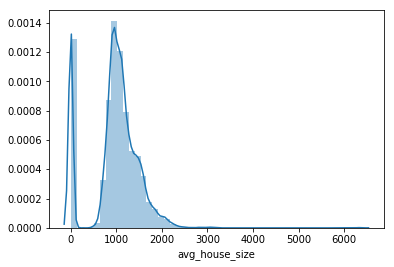

In [30]:
sns.distplot(rental_prices_fillna['avg_house_size'])

In [33]:
100*sale_prices.isnull().sum()/sale_prices.size

zipcode           0.000000
city              0.000000
state             0.000000
metro             0.253408
county            0.000000
month             0.000000
1_br_total        5.738787
2_br_total        4.585441
3_br_total        0.996290
4_br_total        3.279857
5+_br_total       5.314834
1_br_psqft        5.744568
2_br_psqft        4.427422
3_br_psqft        0.734210
4_br_psqft        3.158453
5+_br_psqft       5.310979
avg_house_size    0.631112
dtype: float64

In [34]:
100*rental_prices.isnull().sum()/rental_prices.size

zipcode           0.000000
city              0.000000
state             0.000000
metro             0.012489
county            0.000000
month             0.000000
1_br_total        3.292952
2_br_total        1.577786
3_br_total        2.803797
4_br_total        5.393198
5+_br_total       5.840723
1_br_psqft        3.675950
2_br_psqft        2.046126
3_br_psqft        3.101453
4_br_psqft        5.455643
5+_br_psqft       5.842804
avg_house_size    0.969985
dtype: float64

In [31]:
sale_prices_fillna = sale_prices.fillna(0)
sale_prices_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42735 entries, 0 to 42734
Data columns (total 17 columns):
zipcode           42735 non-null int64
city              42735 non-null object
state             42735 non-null object
metro             42735 non-null object
county            42735 non-null object
month             42735 non-null int64
1_br_total        42735 non-null float64
2_br_total        42735 non-null float64
3_br_total        42735 non-null float64
4_br_total        42735 non-null float64
5+_br_total       42735 non-null float64
1_br_psqft        42735 non-null float64
2_br_psqft        42735 non-null float64
3_br_psqft        42735 non-null float64
4_br_psqft        42735 non-null float64
5+_br_psqft       42735 non-null float64
avg_house_size    42735 non-null float64
dtypes: float64(11), int64(2), object(4)
memory usage: 5.5+ MB


/Users/astridweng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


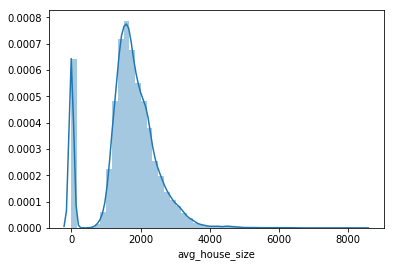

In [32]:
sns.distplot(sale_prices_fillna['avg_house_size'])

In [36]:
sale_prices_fillna.columns

Index(['zipcode', 'city', 'state', 'metro', 'county', 'month', '1_br_total',
       '2_br_total', '3_br_total', '4_br_total', '5+_br_total', '1_br_psqft',
       '2_br_psqft', '3_br_psqft', '4_br_psqft', '5+_br_psqft',
       'avg_house_size'],
      dtype='object')

In [39]:
df_a = sale_prices_fillna.drop(columns = ['1_br_total',
       '2_br_total', '3_br_total', '4_br_total', '5+_br_total', '1_br_psqft',
       '2_br_psqft', '3_br_psqft', '4_br_psqft', '5+_br_psqft'],axis = 1)

In [53]:
df_a['zipmonth'] = df_a.apply(lambda row: row.zipcode *10 + row.month, axis=1)

In [46]:
df_b = rental_prices_fillna.drop(columns = ['1_br_total',
       '2_br_total', '3_br_total', '4_br_total', '5+_br_total', '1_br_psqft',
       '2_br_psqft', '3_br_psqft', '4_br_psqft', '5+_br_psqft'],axis = 1)

In [54]:
df_b['zipmonth'] = df_b.apply(lambda row: row.zipcode *10 + row.month, axis=1)

In [56]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42735 entries, 0 to 42734
Data columns (total 8 columns):
zipcode           42735 non-null int64
city              42735 non-null object
state             42735 non-null object
metro             42735 non-null object
county            42735 non-null object
month             42735 non-null int64
avg_house_size    42735 non-null float64
zipmonth          42735 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.6+ MB


In [57]:
merged = pd.merge(df_a,df_b, on='zipmonth', how='outer',suffixes=('_sales', '_rental'))

In [68]:
merged.columns

Index(['zipcode_sales', 'city_sales', 'state_sales', 'metro_sales',
       'county_sales', 'month_sales', 'avg_house_size_sales', 'zipmonth',
       'zipcode_rental', 'city_rental', 'state_rental', 'metro_rental',
       'county_rental', 'month_rental', 'avg_house_size_rental'],
      dtype='object')

In [59]:
merged.head()

,zipcode_sales,city_sales,state_sales,metro_sales,county_sales,month_sales,avg_house_size_sales,zipmonth,zipcode_rental,city_rental,state_rental,metro_rental,county_rental,month_rental,avg_house_size_rental
0,10023.0,New York,NY,New York,New York,1.0,1841.606540,100231,10023.0,New York,NY,New York,New York,1.0,842.582510
1,10023.0,New York,NY,New York,New York,2.0,1841.683036,100232,10023.0,New York,NY,New York,New York,2.0,834.505167
2,10023.0,New York,NY,New York,New York,3.0,1852.255520,100233,10023.0,New York,NY,New York,New York,3.0,819.385749
3,10023.0,New York,NY,New York,New York,4.0,1862.037698,100234,10023.0,New York,NY,New York,New York,4.0,808.611355
4,10023.0,New York,NY,New York,New York,5.0,1829.757899,100235,10023.0,New York,NY,New York,New York,5.0,801.370706


In [63]:
merged['zipcode_sales'] = merged['zipcode_sales'].fillna(merged['zipcode_rental'])

In [65]:
merged['city_sales'] = merged['city_sales'].fillna(merged['city_rental'])
merged['state_sales'] = merged['state_sales'].fillna(merged['state_rental'])
merged['metro_sales'] = merged['metro_sales'].fillna(merged['metro_rental'])
merged['county_sales'] = merged['county_sales'].fillna(merged['county_rental'])
merged['month_sales'] = merged['month_sales'].fillna(merged['month_rental'])

In [69]:
merged_cleaned = merged.drop(columns = ['zipmonth',
       'zipcode_rental', 'city_rental', 'state_rental', 'metro_rental',
       'county_rental', 'month_rental'],axis = 1)

In [71]:
merged_cleaned = merged_cleaned.fillna(0)

In [ ]:
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='info',how='outer'),dataframe)

In [72]:
merged_cleaned['zipcode_sales'] = merged_cleaned['zipcode_sales'].astype(int)

In [73]:
merged_cleaned.columns

Index(['zipcode_sales', 'city_sales', 'state_sales', 'metro_sales',
       'county_sales', 'month_sales', 'avg_house_size_sales',
       'avg_house_size_rental'],
      dtype='object')

In [75]:
merged_cleaned.rename(columns={'zipcode_sales': 'zipcode', 'city_sales': 'city', 'state_sales': 'state', 'metro_sales': 'metro','county_sales': 'county', 'month_sales': 'month'}, inplace=True)

In [76]:
merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48300 entries, 0 to 48299
Data columns (total 8 columns):
zipcode                  48300 non-null int64
city                     48300 non-null object
state                    48300 non-null object
metro                    48300 non-null object
county                   48300 non-null object
month                    48300 non-null float64
avg_house_size_sales     48300 non-null float64
avg_house_size_rental    48300 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.3+ MB


In [77]:
merged_cleaned.to_csv('Downloads/Datathon Materials 2/housingcleaned.csv')

In [78]:
orders = pd.read_csv("Downloads/orders.csv")
products = pd.read_csv("Downloads/products.csv")

In [79]:
products.describe()

,product_id,weight,dimension_1,dimension_2,dimension_3,num_reviews,onsite_price,on_promotion
count,4.986730e+05,498670.000000,474197.000000,437920.000000,474836.000000,498670.000000,498670.000000,498670.000000
mean,4.609018e+18,26.228471,28.844999,12.679212,28.251321,13.958363,211.134777,0.028283
std,2.657984e+18,1612.289075,41.147142,30.297386,160.957337,96.952757,509.065131,0.165781
min,2.755367e+12,0.000000,-2.400000,0.000000,0.000000,0.000000,0.130000,0.000000
25%,2.308479e+18,1.900000,8.870000,1.500000,10.000000,1.000000,37.990000,0.000000
50%,4.606515e+18,5.000000,19.590000,5.500000,19.000000,2.000000,79.990000,0.000000
75%,6.909973e+18,18.000000,35.400000,16.140000,36.000000,7.000000,195.990000,0.000000
max,9.223371e+18,804404.000000,9125.000000,9375.000000,82270.000000,16149.000000,190805.000000,1.000000


In [80]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498673 entries, 0 to 498672
Data columns (total 13 columns):
website_name         498673 non-null object
product_id           498673 non-null int64
product_name         498673 non-null object
category_name        498670 non-null object
description          498670 non-null object
manufacturer_name    498670 non-null object
weight               498670 non-null float64
dimension_1          474197 non-null float64
dimension_2          437920 non-null float64
dimension_3          474836 non-null float64
num_reviews          498670 non-null float64
onsite_price         498670 non-null float64
on_promotion         498670 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 49.5+ MB


In [82]:
products.dropna(subset=['category_name', 'description','manufacturer_name'],inplace = True)

In [83]:
products.isnull().sum()

website_name             0
product_id               0
product_name             0
category_name            0
description              0
manufacturer_name        0
weight                   0
dimension_1          24473
dimension_2          60750
dimension_3          23834
num_reviews              0
onsite_price             0
on_promotion             0
dtype: int64

In [84]:
products.columns

Index(['website_name', 'product_id', 'product_name', 'category_name',
       'description', 'manufacturer_name', 'weight', 'dimension_1',
       'dimension_2', 'dimension_3', 'num_reviews', 'onsite_price',
       'on_promotion'],
      dtype='object')

In [87]:
products.fillna(0)

,website_name,product_id,product_name,category_name,description,manufacturer_name,weight,dimension_1,dimension_2,dimension_3,num_reviews,onsite_price,on_promotion
0,Joss US,2794209975853350000,Westgate Upholstered Panel Bed,Beds,The 1882 upholstered bed is sure to appeal to ...,Pulaski Furniture,116.000000,59.25,87.50,68.75,7.0,409.99,0.0
1,Joss US,8187816211386240000,3 Piece Leah Bowl Set,"Boxes, Bins, Baskets, & Buckets",Stack green apples on the breakfast bar or dis...,Three Hands Co.,30.800000,23.00,28.35,14.17,0.0,89.99,1.0
2,Joss US,7241740433485130000,Butter Cups/Ranunculus Sunshine Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.000000,16.00,3.00,4.00,0.0,16.99,0.0
3,Joss US,4112163717414330000,Freesias Double Blooming Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.000000,24.00,2.00,2.00,2.0,9.99,0.0
4,Joss US,7667515915391190000,Grand Freesia/Ranunculus Blend Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.000000,36.00,3.00,2.00,2.0,9.99,0.0
5,Joss US,8692364098118970000,Wind Flower/Anemone St. Brigid Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.000000,18.00,3.00,2.00,1.0,9.99,0.0
6,Joss US,4194085979134180000,Luanne Wood Bucket,"Boxes, Bins, Baskets, & Buckets",Accent your den or guest suite with this essen...,Antique Revival,4.000000,10.00,11.00,14.00,2.0,68.99,0.0
7,Joss US,5994070512702900000,Butter Cups/Ranunculus Double Blooming Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.000000,16.00,3.00,4.00,0.0,16.99,0.0
8,Joss US,2589773002138890000,Nonstick Springform Pan,Cake Pans,"Perfect for tortes and cheesecakes, this must-...",Paula Deen,0.900000,13.75,4.50,4.50,4.0,26.99,0.0
9,Joss US,779906680869067000,Horizon Laundry Caddy,Hampers & Baskets,Horizon Laundry Caddy is the perfect storage ...,Venture Horizon,15.000000,32.00,8.50,24.00,253.0,62.99,0.0


In [88]:
products = products.fillna(0)
sns.set()
cols = ['product_id', 'weight', 'dimension_1',
       'dimension_2', 'dimension_3', 'num_reviews', 'onsite_price',
       'on_promotion']
sns.pairplot(products[cols])
plt.show()

KeyboardInterrupt: 

KeyboardInterrupt: 

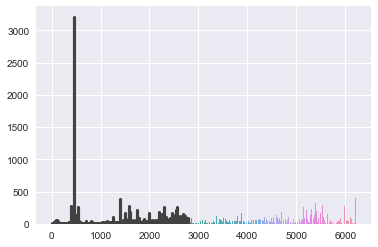

In [89]:
sns.barplot(x='dimension_1',y='weight',data=products)

In [90]:
clickstreams_with_purchase.head()

,customer_id,date,time,page_viewed,product_id,ordered
0,1436364061643577713,2018-07-16,14:37:44,HOMEPAGE,0,0.0
1,1436364061643577713,2018-07-16,14:40:44,PRODUCTSIMPLESKU,205401096165894320,0.0
2,1436364061643577713,2018-07-16,14:42:39,PRODUCTSIMPLESKU,9220344733964903803,0.0
3,1436364061643577713,2018-07-16,14:42:53,PRODUCTSIMPLESKU,9220344733964903803,0.0
4,1436364061643577713,2018-07-16,14:44:46,KEYWORDSEARCH,0,0.0


In [95]:
clickstreams_with_purchase['page_viewed'].describe()

count             11057268
unique                  25
top       PRODUCTOPTIONSKU
freq               4617764
Name: page_viewed, dtype: object

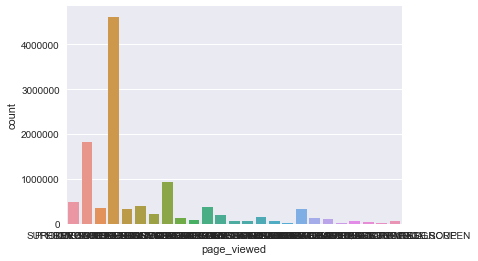

In [96]:
sns.countplot(x="page_viewed", data=clickstreams_with_purchase)

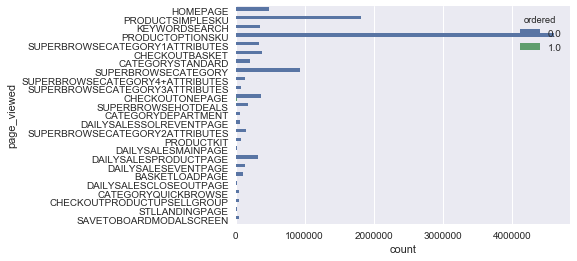

In [97]:
ax = sns.countplot(y="page_viewed", hue="ordered", data=clickstreams_with_purchase)

In [101]:
clickstreams_purchased = clickstreams_with_purchase[ordered]

In [100]:
ordered = clickstreams_with_purchase['ordered']==1

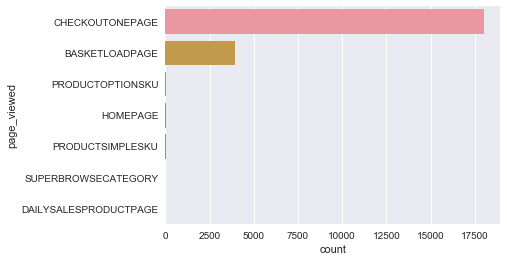

In [102]:
ax = sns.countplot(y="page_viewed",data=clickstreams_purchased)

In [103]:
clickstreams_purchased = clickstreams_with_purchase[clickstreams_with_purchase['page_viewed'] == 'CHECKOUTONEPAGE']

In [104]:
clickstreams_purchased.head()

,customer_id,date,time,page_viewed,product_id,ordered
262,1436364061643577713,2018-07-16,22:33:26,CHECKOUTONEPAGE,0,0.0
263,1436364061643577713,2018-07-16,22:33:30,CHECKOUTONEPAGE,0,0.0
264,1436364061643577713,2018-07-16,22:33:43,CHECKOUTONEPAGE,0,0.0
265,1436364061643577713,2018-07-16,22:34:31,CHECKOUTONEPAGE,0,1.0
323,7202609116071849432,2018-07-16,14:42:23,CHECKOUTONEPAGE,0,0.0


In [105]:
taxes.describe()

,state_fips,zipcode,agi_stub,num_returns,num_single,num_joint,num_hoh,num_dependents,num_elderly,A00100,...,N19300,A19300,N19500,A19500,N04800,A04800,N07220,A07220,N11901,A11901
count,179796.000000,179796.000000,179796.000000,1.797960e+05,1.797960e+05,1.797960e+05,1.797960e+05,1.797960e+05,1.797960e+05,1.797960e+05,...,1.797960e+05,179796.000000,1.797960e+05,1.797960e+05,179796.000000,1.797960e+05,179796.000000,179796.000000,179796.000000,1.797960e+05
mean,29.682073,49237.383813,3.499811,1.635904e+03,7.740388e+02,5.922902e+02,2.371558e+02,1.038398e+03,3.848018e+02,1.140205e+05,...,2.077592e+02,104.513449,5.003738e+02,6.209459e+03,143.291953,1.230071e+03,100.220639,106.752976,39.404992,8.253851e+01
std,15.220987,27533.153855,1.707993,3.524422e+04,2.061460e+04,1.114742e+04,6.402287e+03,2.180605e+04,7.405896e+03,2.642221e+06,...,5.703076e+03,2738.713910,1.039680e+04,2.301202e+05,3329.365708,2.998748e+04,2149.876409,2216.257212,2071.596561,4.819286e+03
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,18.000000,26541.000000,2.000000,5.000000e+01,0.000000e+00,3.000000e+01,0.000000e+00,4.000000e+01,2.000000e+01,3.224000e+03,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
50%,29.000000,49046.000000,3.000000,2.000000e+02,5.000000e+01,9.000000e+01,0.000000e+00,1.200000e+02,6.000000e+01,1.269400e+04,...,0.000000e+00,0.000000,5.000000e+01,3.100000e+02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
75%,42.000000,71752.000000,5.000000,8.800000e+02,2.800000e+02,3.500000e+02,8.000000e+01,5.200000e+02,2.300000e+02,5.365125e+04,...,7.000000e+01,37.000000,2.500000e+02,1.655000e+03,70.000000,5.290000e+02,50.000000,56.000000,0.000000,0.000000e+00
max,56.000000,99999.000000,6.000000,5.975580e+06,4.192710e+06,1.710150e+06,1.001550e+06,3.453950e+06,1.012390e+06,5.947068e+08,...,1.505250e+06,666860.000000,2.033920e+06,6.961893e+07,620790.000000,4.780580e+06,342560.000000,312736.000000,619720.000000,1.403511e+06


In [106]:
taxes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179796 entries, 0 to 179795
Data columns (total 54 columns):
state_fips        179796 non-null int64
state             179796 non-null object
zipcode           179796 non-null int64
agi_stub          179796 non-null int64
num_returns       179796 non-null int64
num_single        179796 non-null int64
num_joint         179796 non-null int64
num_hoh           179796 non-null int64
num_dependents    179796 non-null int64
num_elderly       179796 non-null int64
A00100            179796 non-null int64
A02650            179796 non-null int64
N00200            179796 non-null int64
A00200            179796 non-null int64
N00900            179796 non-null int64
A00900            179796 non-null int64
N01000            179796 non-null int64
A01000            179796 non-null int64
N01400            179796 non-null int64
A01400            179796 non-null int64
N02300            179796 non-null int64
A02300            179796 non-null int64
N02500  

In [107]:
taxes.head()

,state_fips,state,zipcode,agi_stub,num_returns,num_single,num_joint,num_hoh,num_dependents,num_elderly,...,N19300,A19300,N19500,A19500,N04800,A04800,N07220,A07220,N11901,A11901
0,1,AL,0,1,815440,477700,105350,221200,491310,150920,...,25020,5950,46930,74541,17910,82471,27490,15002,0,0
1,1,AL,0,2,495830,211930,142340,128890,360480,109680,...,64360,17611,102740,243301,44430,292180,43580,45248,0,0
2,1,AL,0,3,263390,83420,137870,36340,182880,75570,...,68320,19479,99920,337719,37110,278272,22780,29166,0,0
3,1,AL,0,4,167190,29420,124060,10610,130160,51540,...,58540,18167,79980,362811,24780,202113,17250,22630,0,0
4,1,AL,0,5,217440,20240,188080,4880,195990,68080,...,117980,44270,151920,1065202,34030,298272,20970,29469,390,155


In [110]:
taxes[taxes['zipcode'] == 2155]

,state_fips,state,zipcode,agi_stub,num_returns,num_single,num_joint,num_hoh,num_dependents,num_elderly,...,N19300,A19300,N19500,A19500,N04800,A04800,N07220,A07220,N11901,A11901
71202,25,MA,2155,1,7950,6350,790,660,1450,1940,...,350,82,680,3426,220,629,420,278,0,0
71203,25,MA,2155,2,7300,5380,1020,680,1900,1280,...,610,144,1100,5753,380,2385,800,907,0,0
71204,25,MA,2155,3,5420,3710,1120,410,1410,1180,...,960,249,1550,10355,400,2290,310,432,0,0
71205,25,MA,2155,4,3360,1740,1340,190,1330,820,...,1040,316,1550,12783,390,2111,240,356,0,0
71206,25,MA,2155,5,5360,1470,3620,180,3430,1250,...,2790,939,3930,44573,740,4210,390,596,70,11
71207,25,MA,2155,6,1580,240,1300,30,1260,350,...,1050,431,1500,34567,210,2149,0,0,810,807
